In [ ]:
# ==============================
# Step 1: Environment Setup
# ==============================
# Install dependencies (run once per environment)
!pip install plotsense ucimlrepo scikit-learn pandas matplotlib


In [ ]:

# ==============================
# Step 2: Imports
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import plotsense as ps
from plotsense import recommender, plotgen, explainer
from ucimlrepo import fetch_ucirepo


In [4]:
# ==============================
# Step 3: Load UCI Dataset
# ==============================
# Fetch Breast Cancer Recurrence dataset (UCI ID = 14)
breast_cancer = fetch_ucirepo(id=14)

# Extract features (X) and target (y)
X_raw = breast_cancer.data.features
y_raw = breast_cancer.data.targets

# Combine into one DataFrame for easier processing
df = pd.concat([X_raw, y_raw], axis=1)
print("Raw Data Sample:")
print(df.head())

Raw Data Sample:
     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  30-39   premeno      30-34       0-2        no          3   left   
1  40-49   premeno      20-24       0-2        no          2  right   
2  40-49   premeno      20-24       0-2        no          2   left   
3  60-69      ge40      15-19       0-2        no          2  right   
4  40-49   premeno        0-4       0-2        no          2  right   

  breast-quad irradiat                 Class  
0    left_low       no  no-recurrence-events  
1    right_up       no  no-recurrence-events  
2    left_low       no  no-recurrence-events  
3     left_up       no  no-recurrence-events  
4   right_low       no  no-recurrence-events  


In [6]:
# ==============================
# Step 4: Clean Dataset
# ==============================
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Encode categorical variables into numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Encode target column: recurrence-events = 1, no-recurrence-events = 0
df_encoded["target"] = df["Class"].apply(lambda val: 1 if val == "recurrence-events" else 0)

print("Encoded Data Sample:")
print(df_encoded.head())


Missing values per column:
 age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64
Encoded Data Sample:
   deg-malig  age_30-39  age_40-49  age_50-59  age_60-69  age_70-79  \
0          3       True      False      False      False      False   
1          2      False       True      False      False      False   
2          2      False       True      False      False      False   
3          2      False      False      False       True      False   
4          2      False       True      False      False      False   

   menopause_lt40  menopause_premeno  tumor-size_14-Oct  tumor-size_15-19  \
0           False               True              False             False   
1           False               True              False             False   
2           False               True              False             False   
3           False              Fa

In [7]:
# ==============================
# Step 5: Split Data
# ==============================
X = df_encoded.drop(columns=["Class", "target"], errors="ignore")
y = df_encoded["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (228, 32) Test shape: (58, 32)


In [ ]:
import os
# Set GROQ_API_KEY environment variable
os.environ['GROQ_API_KEY'] = ''

In [8]:
# ==============================
# Step 6: Train Model
# ==============================
# Using Random Forest as a baseline model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


In [9]:
# ==============================
# Step 7: Use PlotSense (Recommendations)
# ==============================
# Ask PlotSense to recommend useful visualizations
suggestions = recommender(df_encoded, n=5)
print("PlotSense Recommendations:")
print(suggestions)


PlotSense Recommendations:
  plot_type                                          variables  \
0      hist                                  deg-malig, target   
1   scatter                 tumor-size_20-24, tumor-size_30-34   
2       bar              Class_recurrence-events, irradiat_yes   
3   boxplot  age_30-39, age_40-49, age_50-59, age_60-69, ag...   
4   heatmap                                  deg-malig, target   

   ensemble_score  model_agreement           source_models  
0             0.5                1  [llama-3.1-8b-instant]  
1             0.5                1  [llama-3.1-8b-instant]  
2             0.5                1  [llama-3.1-8b-instant]  
3             0.5                1  [llama-3.1-8b-instant]  
4             0.5                1  [llama-3.1-8b-instant]  


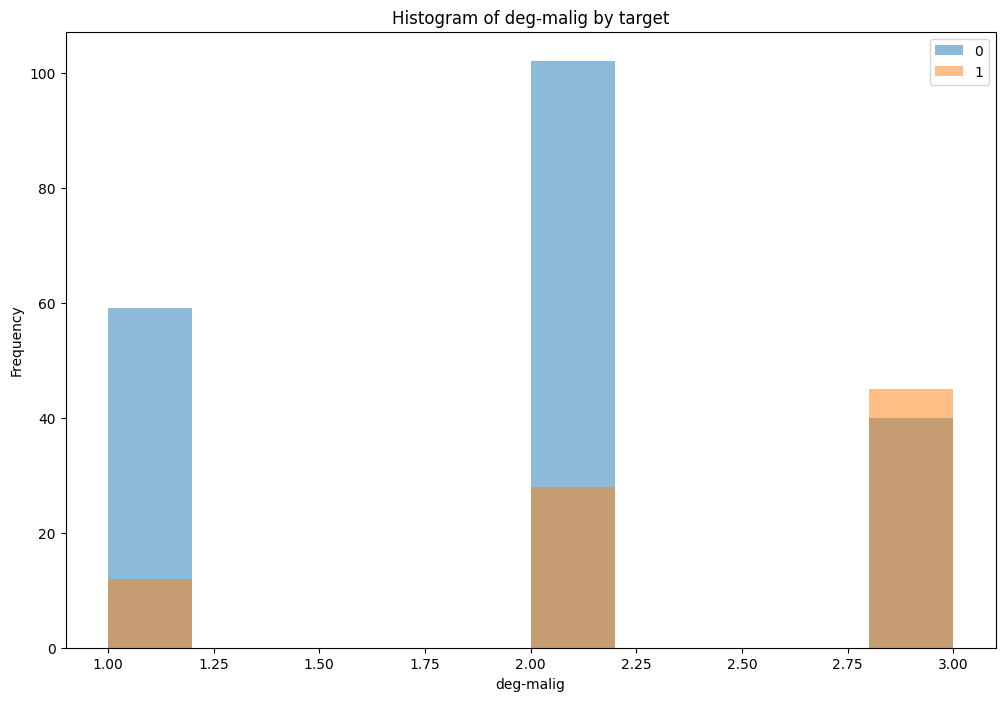

In [15]:
# ==============================
# Step 8: Generate Visualization
# ==============================
# Select the first suggestion (index 0)
plot = plotgen(df_encoded, 0, suggestions)
plt.show()


In [16]:
# ==============================
# Step 9: Explain the Visualization
# ==============================
explanation = explainer(plot)
print("Explanation from PlotSense:\n", explanation)


Explanation from PlotSense:
 ## Explanation of the Data Visualization

### Overview
The provided data visualization is a stacked histogram titled "Histogram of deg-malig by target." It displays the distribution of "deg-malig" values across two target categories (0 and 1), represented by colors (blue for 0 and orange for 1). The histogram shows the frequency of "deg-malig" values on the y-axis, ranging from 0 to 100, and the "deg-malig" values on the x-axis, divided into intervals: approximately 1.00-1.25, 1.75-2.25, and 2.75-3.00.

### Key Features
- **Distribution of deg-malig**: The histogram illustrates the distribution of "deg-malig" values across three distinct intervals.
  - For category 0 (blue), the frequencies are approximately 58, 100, and 2, respectively.
  - For category 1 (orange), the frequencies are approximately 13, 28, and 43, respectively.

### Insights and Patterns
- **Bimodal Distribution for Category 0**: The blue bars indicate that for category 0, "deg-malig" valu